# Data Sumary

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df=pd.read_csv("Luxembourg_Electricty_Consumption.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start date     1828 non-null   object 
 1   total_load     1828 non-null   float64
 2   residual_load  1828 non-null   float64
 3   tavg           1828 non-null   float64
 4   tmin           1828 non-null   float64
 5   tmax           1828 non-null   float64
 6   prcp           1828 non-null   float64
 7   wdir           1828 non-null   int64  
 8   wspd           1828 non-null   float64
 9   wpgt           1817 non-null   float64
 10  pres           1828 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 157.2+ KB


In [29]:
df.rename(columns={"Start date": "start_date"}, inplace=True)

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   start_date     1828 non-null   datetime64[ns]
 1   total_load     1828 non-null   float64       
 2   residual_load  1828 non-null   float64       
 3   tavg           1828 non-null   float64       
 4   tmin           1828 non-null   float64       
 5   tmax           1828 non-null   float64       
 6   prcp           1828 non-null   float64       
 7   wdir           1828 non-null   int64         
 8   wspd           1828 non-null   float64       
 9   wpgt           1817 non-null   float64       
 10  pres           1828 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 157.2 KB


In [31]:
df.head(3)

,start_date,total_load,residual_load,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2020-01-01,11372.75,11243.00,0.2,-1.6,2.7,0.0,93,10.8,25.0,1033.9
1,2020-01-02,13644.25,13233.75,0.5,-2.1,3.7,0.5,172,12.3,25.0,1029.4
2,2020-01-03,13730.75,11648.75,5.8,3.5,8.0,1.6,220,19.4,37.0,1023.8


In [32]:
df.isnull().sum()

start_date        0
total_load        0
residual_load     0
tavg              0
tmin              0
tmax              0
prcp              0
wdir              0
wspd              0
wpgt             11
pres              0
dtype: int64

In [33]:
df['wpgt'].interpolate(method='linear', inplace=True)


Interpolation (Smart Filling)

In [37]:
df.isnull().sum()

start_date       0
total_load       0
residual_load    0
tavg             0
tmin             0
tmax             0
prcp             0
wdir             0
wspd             0
wpgt             0
pres             0
dtype: int64

In [38]:
df.describe()

,total_load,residual_load,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,13503.953091,11829.201723,10.713840,6.847210,14.653446,2.259136,174.050328,15.433479,37.313184,1016.918435
std,1545.653186,1847.291062,6.902512,5.993261,8.247290,5.056035,98.772885,5.166478,11.653167,9.086321
min,9335.000000,5836.250000,-8.300000,-13.000000,-5.400000,0.000000,0.000000,5.300000,11.100000,979.300000
25%,12392.687500,10507.500000,5.400000,2.400000,8.300000,0.000000,66.000000,11.600000,29.000000,1012.000000
50%,13586.125000,11879.750000,10.300000,6.700000,14.500000,0.000000,202.000000,14.600000,36.000000,1017.200000
75%,14623.187500,13083.187500,16.300000,11.700000,21.100000,2.200000,248.000000,18.300000,43.000000,1022.600000
max,16895.750000,16805.250000,28.900000,22.800000,36.300000,76.600000,359.000000,42.500000,90.000000,1046.300000


array([[<AxesSubplot:title={'center':'start_date'}>,
        <AxesSubplot:title={'center':'total_load'}>,
        <AxesSubplot:title={'center':'residual_load'}>],
       [<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'prcp'}>,
        <AxesSubplot:title={'center':'wdir'}>,
        <AxesSubplot:title={'center':'wspd'}>],
       [<AxesSubplot:title={'center':'wpgt'}>,
        <AxesSubplot:title={'center':'pres'}>, <AxesSubplot:>]],
      dtype=object)

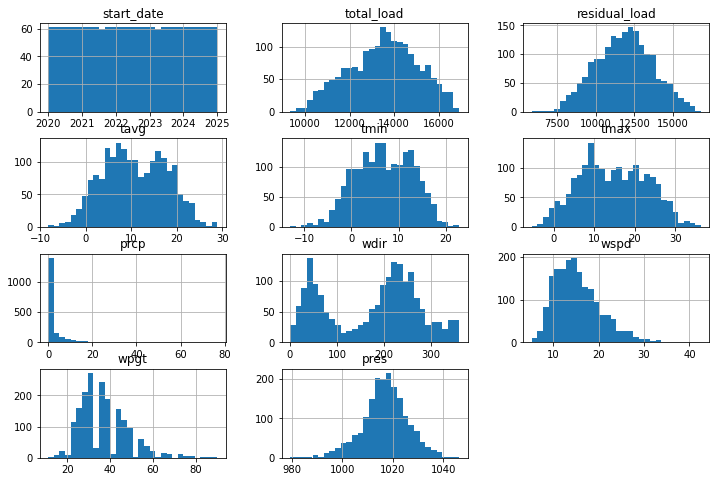

In [39]:
df.hist(figsize=(12, 8), bins=30)

<AxesSubplot:>

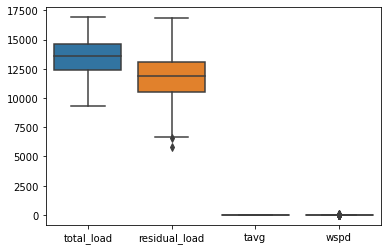

In [40]:
import seaborn as sns
sns.boxplot(data=df[['total_load', 'residual_load', 'tavg', 'wspd']])

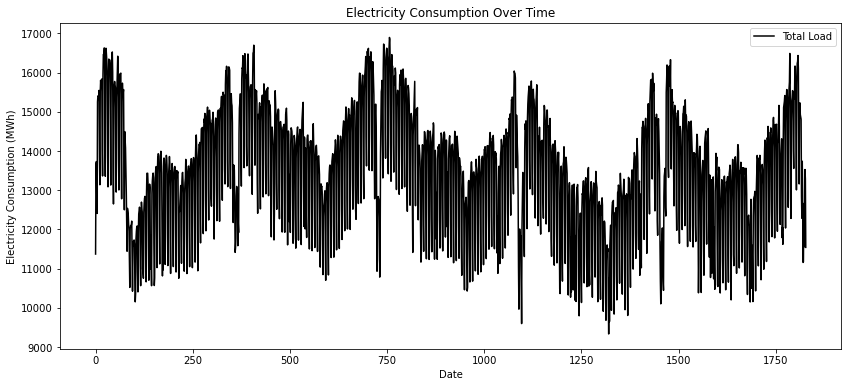

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['total_load'], label='Total Load', color='black')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MWh)')
plt.title('Electricity Consumption Over Time')
plt.legend()
plt.show()

By lookin thatwe can say that data is not showing a trend but data show a strong seasonality

<AxesSubplot:title={'center':'30-Day Rolling Mean of Electricity Consumption'}>

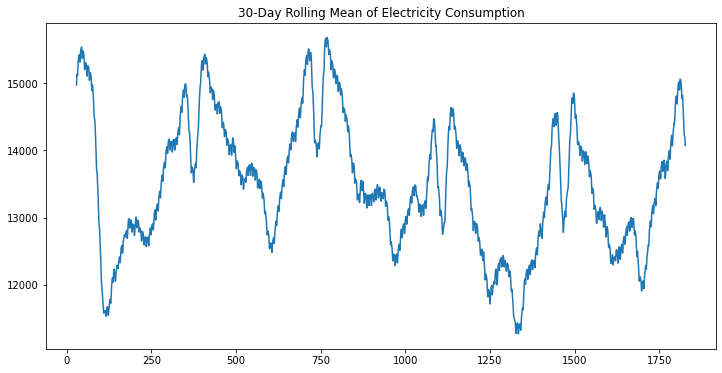

In [43]:
df['total_load'].rolling(window=30).mean().plot(figsize=(12, 6), title='30-Day Rolling Mean of Electricity Consumption')

<AxesSubplot:>

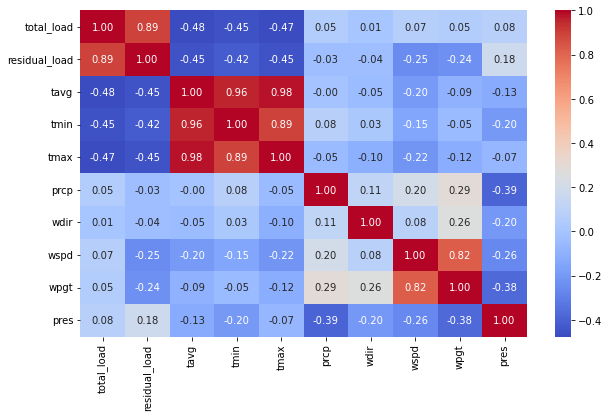

In [45]:
corr_matrix = df.corr()
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

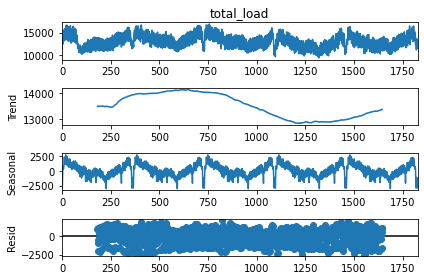

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['total_load'], model='additive', period=365)
decomposition.plot()
plt.show()

# Model Training

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [63]:
features = ['start_date','tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']
X = df[features]
y = df['total_load']

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


# Moving Average

In [67]:
moving_avg_forecast = y_train.rolling(window=30).mean().iloc[-1]
moving_avg_forecast_series = np.full(len(y_test), moving_avg_forecast)

In [68]:
y_test

1462    12832.25
1463    13358.25
1464    13462.75
1465    13557.75
1466    12553.75
          ...   
1823    11555.50
1824    12157.00
1825    13528.00
1826    13288.00
1827    11543.50
Name: total_load, Length: 366, dtype: float64

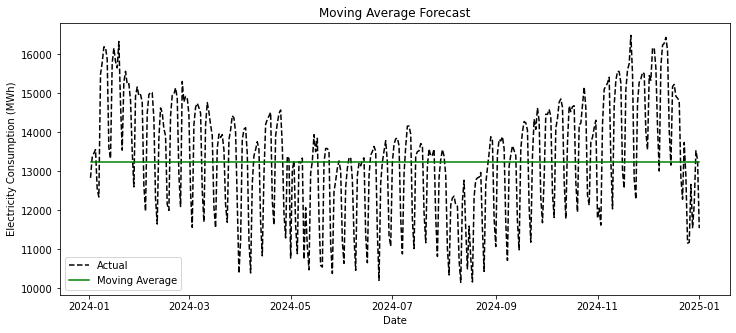

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], moving_avg_forecast_series, label="Moving Average", color="green")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Moving Average Forecast")
plt.legend()
plt.show()

# Exponential Smoothing

C:\Users\alisa\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\alisa\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


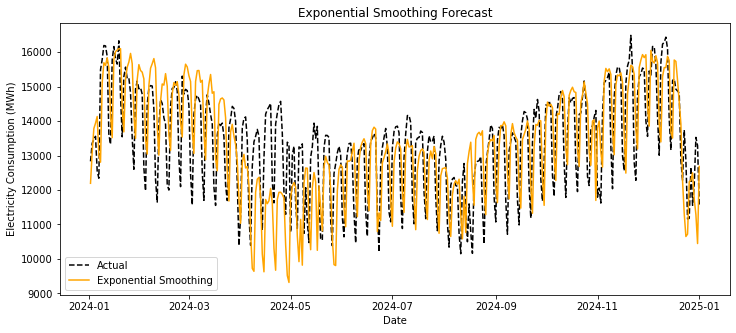

In [72]:
exp_smooth_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=365)
exp_smooth_fit = exp_smooth_model.fit()
exp_smooth_forecast = exp_smooth_fit.forecast(len(y_test))


plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], exp_smooth_forecast, label="Exponential Smoothing", color="orange")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()

# ARIMA

In [85]:
arima_model = ARIMA(y_train, order=(5,1,30))  
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(len(y_test))

C:\Users\alisa\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


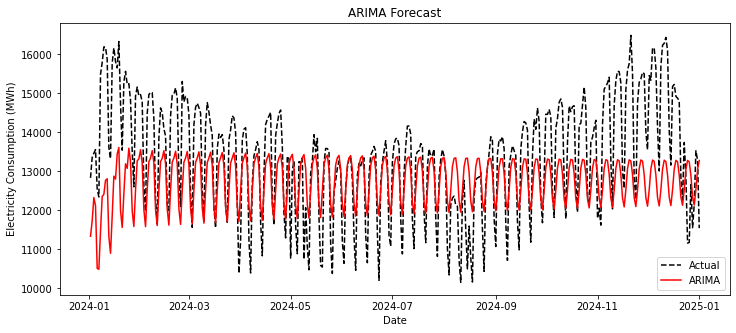

In [86]:
plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], arima_forecast, label="ARIMA", color="red")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

# Random Forest Model

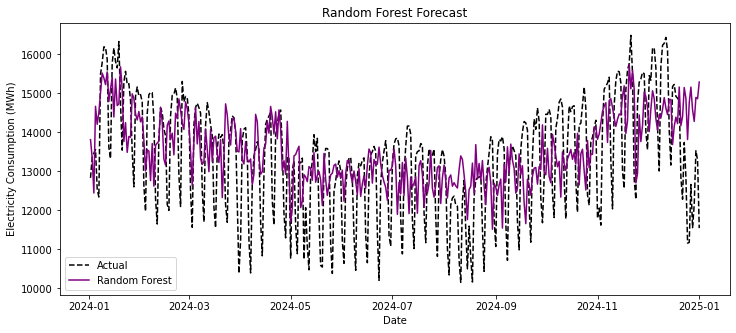

In [94]:
features_RF = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']
X_RF = df[features_RF]
y_RF = df['total_load']

train_size = int(len(df) * 0.8)
X_train_RF, X_test_RF = X_RF.iloc[:train_size], X_RF.iloc[train_size:]
y_train_RF, y_test_RF = y_RF.iloc[:train_size], y_RF.iloc[train_size:]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_RF, y_train_RF)
rf_forecast = rf_model.predict(X_test_RF)

plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test_RF, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], rf_forecast, label="Random Forest", color="purple")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Random Forest Forecast")
plt.legend()
plt.show()


# SVR

In [98]:
features_SVR = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']
X_SVR = df[features_SVR]
y_SVR = df['total_load']

train_size = int(len(df) * 0.8)
X_train_SVR, X_test_SVR = X_SVR.iloc[:train_size], X_SVR.iloc[train_size:]
y_train_SVR, y_test_SVR = y_SVR.iloc[:train_size], y_SVR.iloc[train_size:]





In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_SVR)
X_test_scaled = scaler.transform(X_test_SVR)

# Train SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train_SVR)
svr_forecast = svr_model.predict(X_test_scaled)

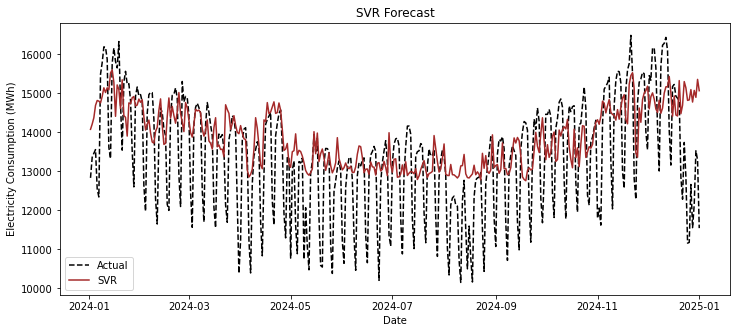

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], svr_forecast, label="SVR", color="brown")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("SVR Forecast")
plt.legend()
plt.show()

# Linear Regression

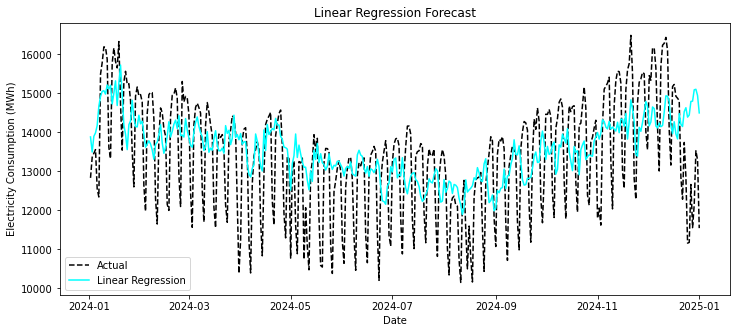

In [96]:
features_LR = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']
X_LR = df[features_LR]
y_LR = df['total_load']

train_size = int(len(df) * 0.8)
X_train_LR, X_test_LR = X_RF.iloc[:train_size], X_RF.iloc[train_size:]
y_train_LR, y_test_LR = y_RF.iloc[:train_size], y_RF.iloc[train_size:]


lr_model = LinearRegression()
lr_model.fit(X_train_LR, y_train_LR)
lr_forecast = lr_model.predict(X_test_LR)

plt.figure(figsize=(12, 5))
plt.plot(X_test['start_date'], y_test, label="Actual", color="black", linestyle="dashed")
plt.plot(X_test['start_date'], lr_forecast, label="Linear Regression", color="cyan")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Linear Regression Forecast")
plt.legend()
plt.show()




# Evaluation

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def compute_errors(actual, predicted, method_name):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=False)
    mape = (abs(actual - predicted) / actual).mean() * 100  
    
    return {"Method": method_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE (%)": mape}

error_results = []


error_results.append(compute_errors(y_test, moving_avg_forecast_series, "Moving Average"))


error_results.append(compute_errors(y_test, exp_smooth_forecast, "Exponential Smoothing"))


error_results.append(compute_errors(y_test, arima_forecast, "ARIMA"))


error_results.append(compute_errors(y_test, rf_forecast, "Random Forest"))


error_results.append(compute_errors(y_test, svr_forecast, "SVR"))


error_results.append(compute_errors(y_test, lr_forecast, "Linear Regression"))


error_df = pd.DataFrame(error_results)


print(error_df)

                  Method          MAE           MSE         RMSE  MAPE (%)
0         Moving Average  1200.486794  2.148250e+06  1465.690973  9.162118
1  Exponential Smoothing  1072.986398  1.871423e+06  1367.999623  8.274850
2                  ARIMA  1078.341358  1.902310e+06  1379.242612  7.849744
3          Random Forest  1104.339057  1.837470e+06  1355.532958  8.673333
4                    SVR  1050.873153  1.871547e+06  1368.044794  8.465163
5      Linear Regression  1074.133121  1.693566e+06  1301.370923  8.454071
